<a href="https://colab.research.google.com/github/Bushman57/3.2project/blob/main/IntroductionTo_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Neural Network

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

We are trying to build a model to predict a class of plants for the iris dataset .The structure of the network entails an input,2-Hidden layers and an output layer

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)

  def __init__(self,in_features=4, h1=8,h2=9,out_features=3) -> None:
    super().__init__() #Instantiate our nn.Module
    self.fc1 =nn.Linear(in_features,h1) #fc1 - fully connected
    self.fc2 =nn.Linear(h1,h2)
    self.out =nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x =self.out(x)
    return x


In [3]:
# Pick a manual seed for randomization
torch.manual_seed(42)
# Create an instance of model
model =Model()

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)


<ipython-input-7-7fcdfb15c272>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


In [8]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
# Train_test and split
X =my_df.drop('species',axis=1)
y=my_df['species']

In [10]:
# Convert these to numpy arrays
X= X.values
y= y.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Train test split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [14]:
# Convert y labe;s to intergers
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [15]:
## This section kinda look like model compiling

# Set the criterion of model to measure the error , how far off the prediction are from the actual data
criterion =nn.CrossEntropyLoss()
# Choose Optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


In [16]:
# Train our model
epochs = 100
losses =[]
for i in range(epochs):
  # Go forward and get a prediction
  y_pred =model.forward(X_train)
  # Measure the loss/error
  loss = criterion(y_pred,y_train)

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation : take the error rate of forward propagation
  # and feeds it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.0846847295761108
Epoch: 10 and loss: 0.9183797240257263
Epoch: 20 and loss: 0.7622429728507996
Epoch: 30 and loss: 0.6273833513259888
Epoch: 40 and loss: 0.4667472541332245
Epoch: 50 and loss: 0.28770601749420166
Epoch: 60 and loss: 0.16738919913768768
Epoch: 70 and loss: 0.10598888993263245
Epoch: 80 and loss: 0.0802135244011879
Epoch: 90 and loss: 0.06947019696235657


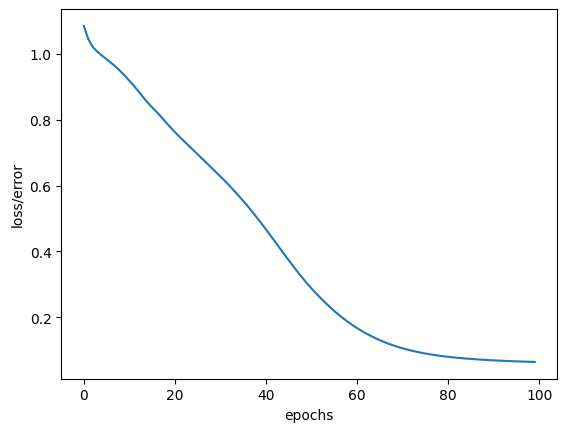

In [17]:
plt.plot(range(epochs),losses)
plt.ylabel('loss/error')
plt.xlabel('epochs');

In [18]:
# Evaluate Model on Test data Set (validate model on test )
with torch.no_grad(): # Basically turn off back propagation
  y_eval = model.forward(X_test)  # X_test are features from out test, y_eval will be
  loss = criterion(y_eval,y_test)  # Find the loss error

In [19]:
loss

tensor(0.0634)

In [27]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'We got {correct} correct!')
#

1.) tensor([-1.4120,  6.3132,  2.6088]) 	 1 	 1
2.) tensor([ 8.4023,  2.4573, -7.5391]) 	 0 	 0
3.) tensor([-12.1991,   1.1829,  13.7443]) 	 2 	 2
4.) tensor([-1.6752,  5.9271,  2.8622]) 	 1 	 1
5.) tensor([-1.5887,  6.7559,  2.8371]) 	 1 	 1
6.) tensor([ 7.8451,  2.3289, -7.0010]) 	 0 	 0
7.) tensor([ 1.1273,  6.0707, -0.0493]) 	 1 	 1
8.) tensor([-5.2088,  4.4484,  6.5316]) 	 2 	 2
9.) tensor([-3.2614,  4.9128,  4.4788]) 	 1 	 1
10.) tensor([0.5683, 6.5565, 0.5445]) 	 1 	 1
11.) tensor([-4.3492,  4.7780,  5.6344]) 	 2 	 2
12.) tensor([ 7.3631,  2.0552, -6.5497]) 	 0 	 0
13.) tensor([ 8.1384,  2.3552, -7.2879]) 	 0 	 0
14.) tensor([ 7.4936,  2.1057, -6.6740]) 	 0 	 0
15.) tensor([ 7.8643,  2.2491, -7.0269]) 	 0 	 0
16.) tensor([-1.3322,  6.5325,  2.5448]) 	 1 	 1
17.) tensor([-8.2712,  2.4244,  9.6406]) 	 2 	 2
18.) tensor([0.3374, 6.4826, 0.7657]) 	 1 	 1
19.) tensor([-1.5909,  5.7677,  2.7565]) 	 1 	 1
20.) tensor([-8.1891,  2.2739,  9.5411]) 	 2 	 2
21.) tensor([ 7.2431,  2.0816, -

In [29]:
## Using real time features on your model
new_iris = torch.tensor([4.7,3.2,1.2,0.2])

In [30]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 7.3071,  2.0335, -6.4964])


In [31]:
# Save our NN model
torch.save(model.state_dict(),'Iris_model.pt')

In [32]:
# Load the saved Model
new_model = Model()
new_model.load_state_dict(torch.load('Iris_model.pt'))

<ipython-input-32-b12febe02272>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('Iris_model.pt'))


<All keys matched successfully>

In [33]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

## cnn model